## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\supply_chain_data.csv")

Product Type: The type of product associated with specific data in the supply chain.

SKU (Stock Keeping Unit): Unique code used to identify a particular product.

Price: The price of the product or item in the supply chain.

Availability: Information about product availability.

Number of Products Sold: The number of products that have been sold in a certain time period.

Revenue Generated: Total revenue generated from product sales in a certain time period.

Customer demographics: Information about customer characteristics, such as age, gender, geographic location, etc.

Stock Levels: The number of products still available in stock at any given time.

Lead Times: The time required to order or receive products from suppliers.

Order Quantities: The number of products ordered in one order or shipment.

Shipping Times: The time required to ship products from the warehouse or distribution center to customers.

Shipping Carriers: Companies or services used to ship products to customers.

Shipping Costs: Costs associated with shipping products, including delivery fees and additional fees.

Supplier Name: Name of supplier or vendor who provides products or materials to the company.

Location: The physical location associated with the data in the supply chain, such as the location of a warehouse or distribution center.

Lead Time: The time required to obtain products or materials from a particular supplier.

Production Volumes: The number of products produced in a certain time period.

Manufacturing Lead Time: The time required to produce a product, from ordering materials until the product is ready.

Manufacturing Costs: Costs related to the production process, including raw material costs, labor, etc.

Inspection Results: Results of product or material quality inspection.

Defect Rates: The level of defects or defects in the products produced.

Transportation Modes: The transportation mode used to send products, such as land, sea or air.

Routes: Routes or paths used to send products from one point to another in the supply chain.

Costs: Costs related to various aspects of the supply chain, including transportation costs, production costs, and other costs.

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
df = df.drop(['SKU'], axis = 1)

## Data Analysis

In [6]:
df.groupby("Product type")["Availability"].count()

Product type
cosmetics    26
haircare     34
skincare     40
Name: Availability, dtype: int64

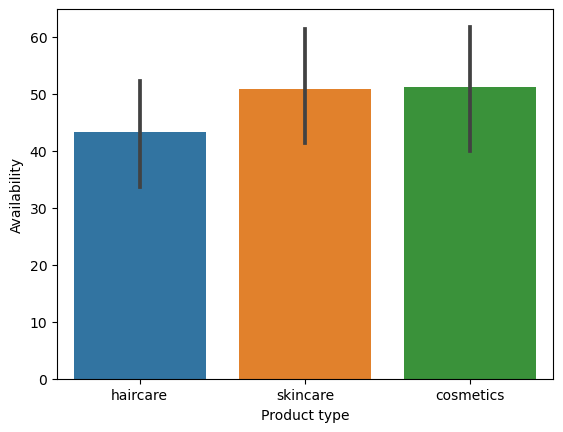

In [7]:
sns.barplot(x = df["Product type"], y = df["Availability"], data = df)
plt.show()

Customer demographics
Female        12801
Male           7507
Non-binary    10580
Unknown       15211
Name: Number of products sold, dtype: int64


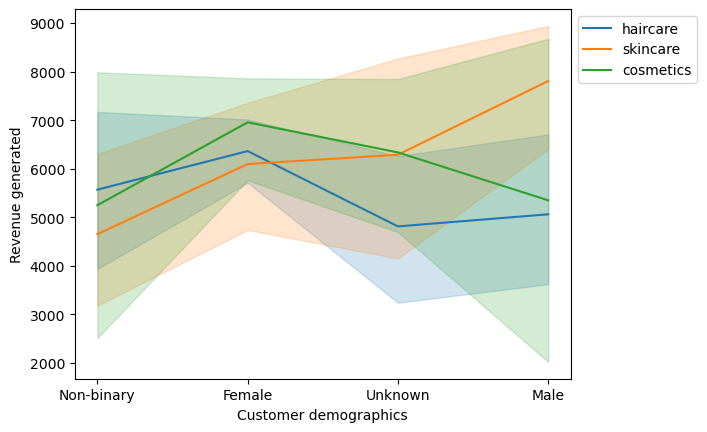

In [8]:
df2 = df.groupby("Customer demographics")["Number of products sold"].sum()
print(df2)

sns.lineplot(data = df, x = "Customer demographics", y = "Revenue generated", hue = "Product type")
plt.legend(loc = "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [9]:
df1 = df.groupby(["Location","Customer demographics"])["Number of products sold"].sum()
df1

Location   Customer demographics
Bangalore  Female                   1530
           Male                     1206
           Non-binary               2021
           Unknown                   663
Chennai    Female                   1620
           Male                      646
           Non-binary               1581
           Unknown                  4921
Delhi      Female                   4002
           Male                     1859
           Non-binary               1767
           Unknown                  2087
Kolkata    Female                   3989
           Male                     1901
           Non-binary               3258
           Unknown                  3622
Mumbai     Female                   1660
           Male                     1895
           Non-binary               1953
           Unknown                  3918
Name: Number of products sold, dtype: int64

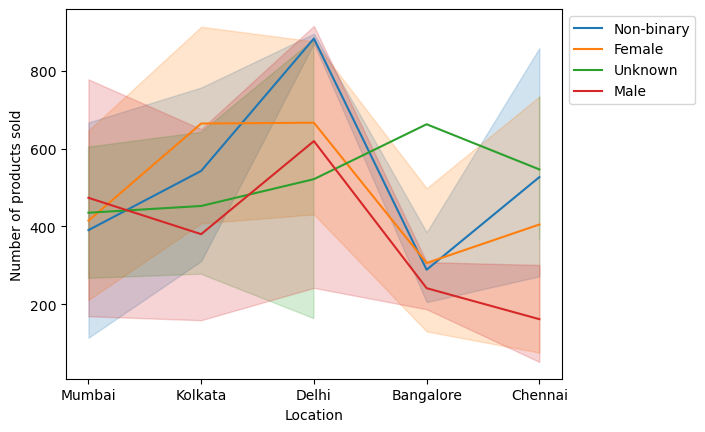

In [10]:
sns.lineplot(data = df, x = "Location", y = "Number of products sold", hue = "Customer demographics")
plt.legend(loc = "upper left", bbox_to_anchor=(1, 1))
plt.show()

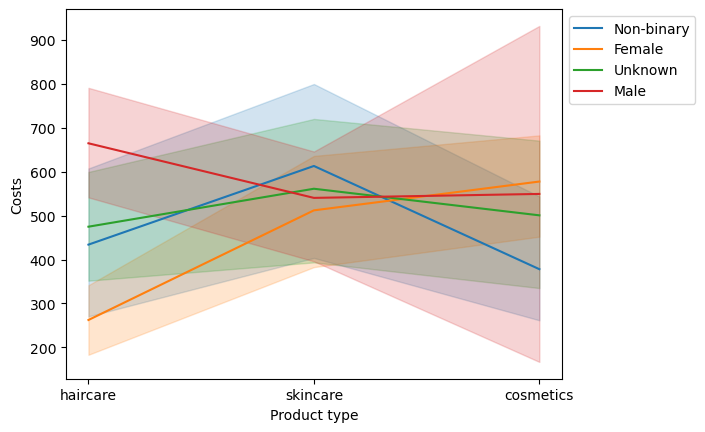

In [11]:

sns.lineplot(data = df, x = df["Product type"], y = df["Costs"], hue = "Customer demographics")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

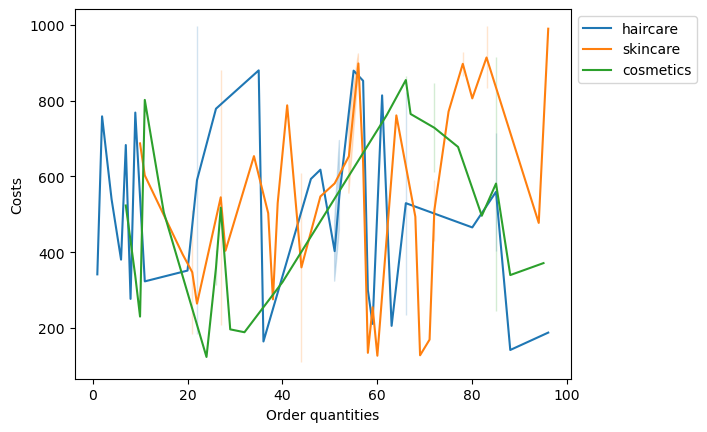

In [12]:
sns.lineplot(data = df, x = df["Order quantities"], y = df["Costs"], hue = "Product type")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

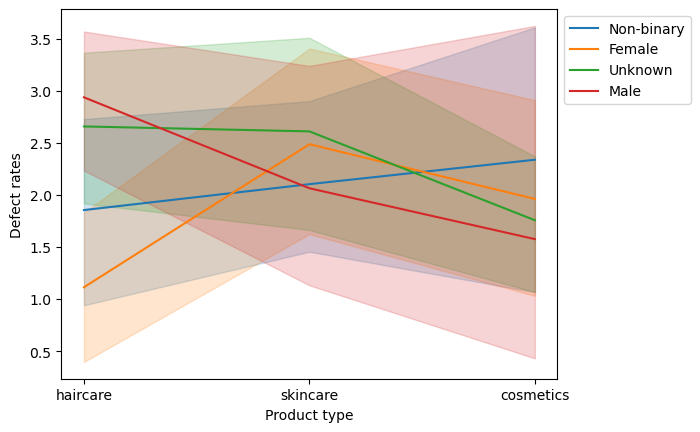

In [13]:
sns.lineplot(data = df, x = "Product type", y = "Defect rates", hue = "Customer demographics")
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

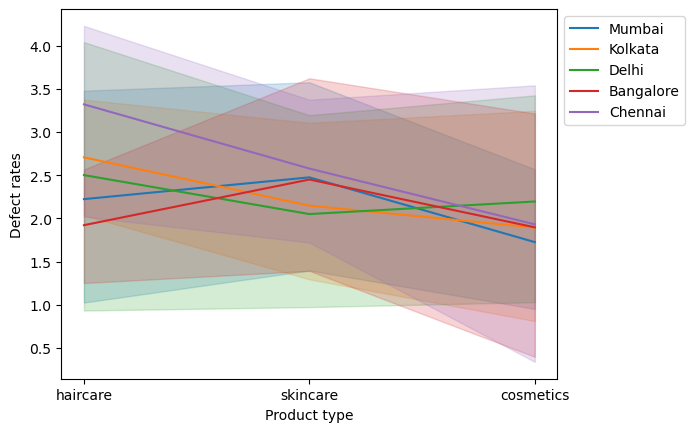

In [14]:
sns.lineplot(data = df, x = "Product type", y = "Defect rates", hue = "Location")
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

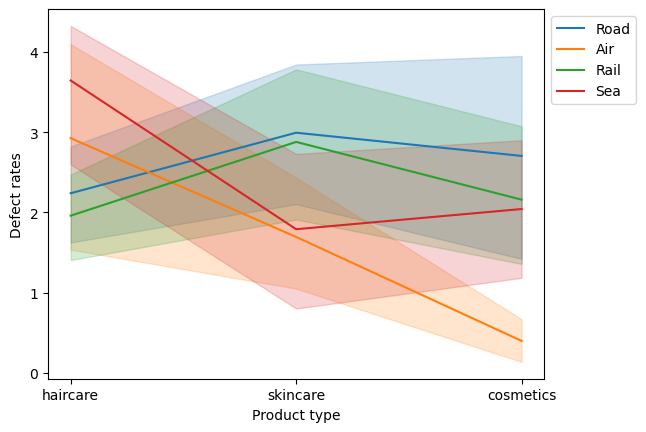

In [15]:
sns.lineplot(data = df, x = "Product type", y = "Defect rates", hue = "Transportation modes")
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

## Encoding data

In [16]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True, drop_invariant = True)
df_encoded = encoder.fit_transform(df)
df_encoded.head()

,Product type_haircare,Product type_skincare,Product type_cosmetics,Price,Availability,Number of products sold,Revenue generated,Customer demographics_Non-binary,Customer demographics_Female,Customer demographics_Unknown,...,Inspection results_Pass,Defect rates,Transportation modes_Road,Transportation modes_Air,Transportation modes_Rail,Transportation modes_Sea,Routes_Route B,Routes_Route C,Routes_Route A,Costs
0,1,0,0,69.808006,55,802,8661.996792,1,0,0,...,0,0.226410,1,0,0,0,1,0,0,187.752075
1,0,1,0,14.843523,95,736,7460.900065,0,1,0,...,0,4.854068,1,0,0,0,1,0,0,503.065579
2,1,0,0,11.319683,34,8,9577.749626,0,0,1,...,0,4.580593,0,1,0,0,0,1,0,141.920282
3,0,1,0,61.163343,68,83,7766.836426,1,0,0,...,0,4.746649,0,0,1,0,0,0,1,254.776159
4,0,1,0,4.805496,26,871,2686.505152,1,0,0,...,0,3.145580,0,1,0,0,0,0,1,923.440632


## Splitting Training and Testing Data

In [53]:
X = df.iloc[:,:7]
y = df["Costs"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [67]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True, drop_invariant = True)
df_encoded = encoder.fit_transform(X)
X = df_encoded.drop(['Product type_cosmetics','Customer demographics_Male'], axis = 1)
X.head()

,Product type_haircare,Product type_skincare,Price,Availability,Number of products sold,Revenue generated,Customer demographics_Non-binary,Customer demographics_Female,Customer demographics_Unknown,Stock levels
0,1,0,69.808006,55,802,8661.996792,1,0,0,58
1,0,1,14.843523,95,736,7460.900065,0,1,0,53
2,1,0,11.319683,34,8,9577.749626,0,0,1,1
3,0,1,61.163343,68,83,7766.836426,1,0,0,23
4,0,1,4.805496,26,871,2686.505152,1,0,0,5


## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X,y)
model.score(X,y)

0.04047015909042362

## Ridge Regression

In [69]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=1.0)
rdg.fit(X, y)
rdg.score(X,y)

0.03990475994338216

In [70]:
rdg = Ridge(alpha = 8)
rdg.fit(X, y)
rdg.score(X,y)

0.03232080397933956

In [71]:
rdg = Ridge(alpha = 2.0)
rdg.fit(X, y)
rdg.score(X,y)

0.038794631017297965

## Lasso Regression

In [72]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X,y)
clf.score(X,y)

0.04045945420542174

In [73]:
clf = linear_model.Lasso(alpha=0.556)
clf.fit(X,y)
clf.score(X,y)

0.040138904005398435

In [74]:
clf = linear_model.Lasso(alpha=1.3)
clf.fit(X,y)
clf.score(X,y)

0.03866003478282276

In [75]:
clf = linear_model.Lasso(alpha=4.5)
clf.fit(X,y)
clf.score(X,y)

0.02235997343252072

## Bayesian Regression

In [76]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(X,y)
clf.score(X,y)

0.0002894858697132241